# Stock Market Data Analysis

In [38]:
#imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from datetime import datetime
from __future__ import division
pd.core.common.is_list_like = pd.api.types.is_list_like
# For reading stock data from The Investors Exchange (IEX)
import pandas_datareader as web
import yfinance as yf

Obtain Data from Yahoo


In [39]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month,end.day)
stock_data = {}

for stock in tech_list:
    data = yf.download(stock, start=start, end=end)
    globals()[stock] = data
    # print(f"{stock} data. Head:\n", data.head(), "\n")

/tmp/ipykernel_171508/4060872560.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_171508/4060872560.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_171508/4060872560.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_171508/4060872560.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


In [40]:
AAPL.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-06-20,208.703949,213.242735,207.877826,212.934166,86172500
2024-06-21,206.524155,210.903667,206.145919,209.410649,246421400
2024-06-24,207.171112,211.709883,205.628324,206.753069,80727000
2024-06-25,208.096802,210.396046,207.638936,208.176416,56713900
2024-06-26,212.257339,213.859846,209.659488,210.515486,66213200


In [41]:
AAPL.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,222.871561,225.154405,220.227331,222.581168,5.438012e+07
std,15.386981,14.849360,15.748748,15.454853,2.990785e+07
min,172.194199,190.090729,168.988411,171.724805,2.323470e+07
25%,212.541088,214.393190,209.668371,212.178497,3.953412e+07
50%,224.210564,226.070012,222.231364,224.170641,4.711600e+07
75%,232.515671,234.263584,229.182156,232.447929,5.932100e+07
max,258.396667,259.474086,257.010028,257.568678,3.186799e+08


In [42]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-06-20 to 2025-06-18
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   250 non-null    float64
 1   (High, AAPL)    250 non-null    float64
 2   (Low, AAPL)     250 non-null    float64
 3   (Open, AAPL)    250 non-null    float64
 4   (Volume, AAPL)  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


### Closing Price

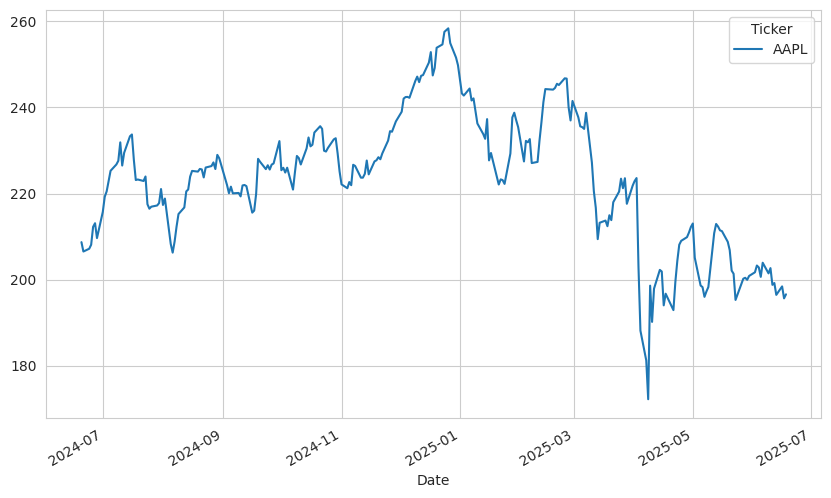

In [43]:
AAPL['Close'].plot(legend=True, figsize = (10,6))
plt.show()

### Volume Traded

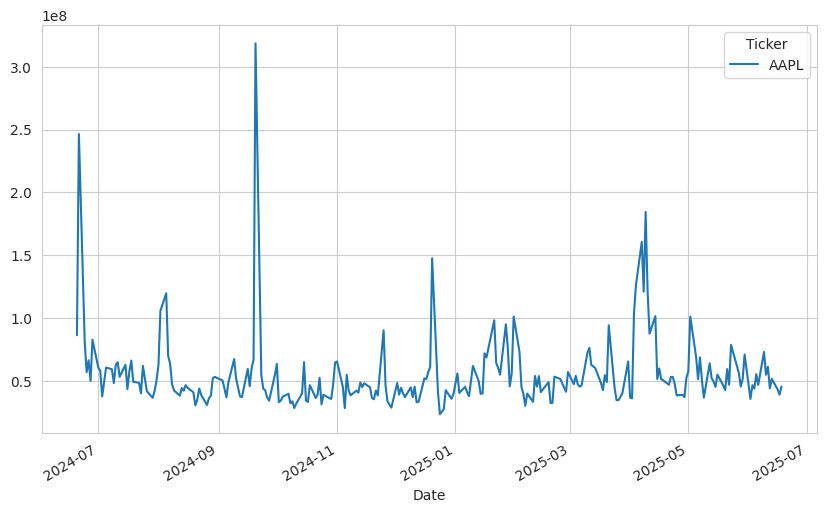

In [44]:
AAPL["Volume"].plot(legend=True,figsize=(10,6))
plt.show()

### Moving Average (MA)

Moving Average(MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out "noise" from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.

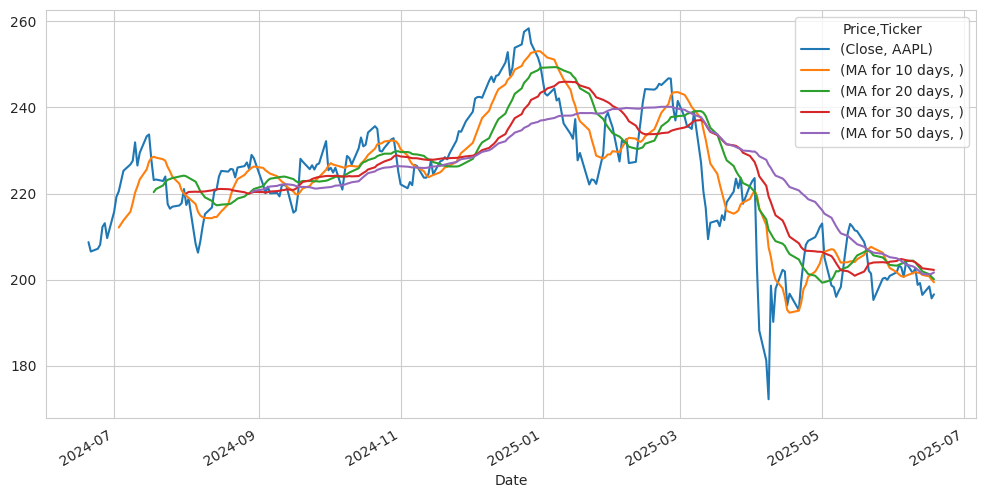

In [45]:
ma_day = [10, 20, 30 , 50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = pd.DataFrame.rolling(AAPL['Close'],ma).mean()


AAPL[['Close', 'MA for 10 days','MA for 20 days','MA for 30 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))
plt.show()

### Daily Return Analysis

Now, we will analyze the risk of stock and in order to do so, we need take a closer look at the daily changes of the stock and not just the absolute values.


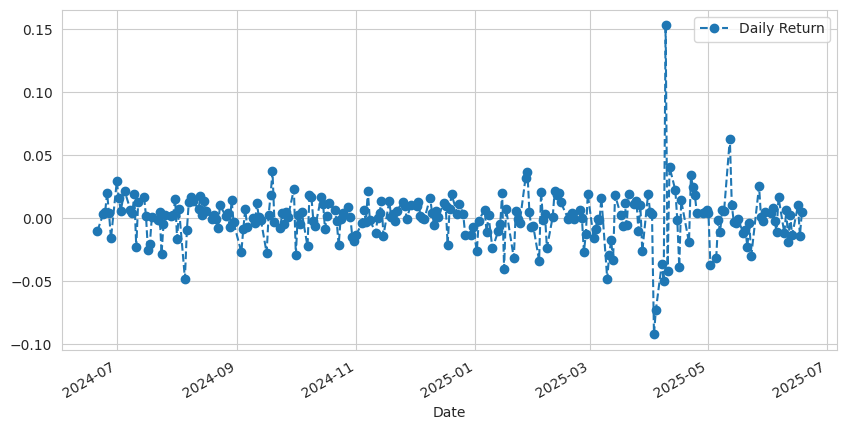

In [47]:
AAPL['Daily Return'] = AAPL['Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,5),legend=True, linestyle='--',marker='o')
plt.show()

/tmp/ipykernel_171508/2301651592.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color="green")


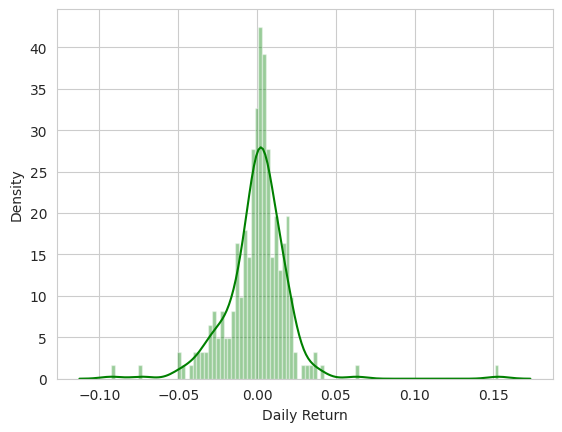

In [48]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color="green")
plt.show()

Let's analyze the returns of all the stocks in our ```tech_list```.

In [51]:
closing_df1 = pd.DataFrame(AAPL["Close"])
Close1 = closing_df1.rename(columns={"Close": "AAPL_Close"})

closing_df2 = pd.DataFrame(GOOG["Close"])
Close2 = closing_df2.rename(columns={"Close": "GOOG_Close"})

closing_df3 = pd.DataFrame(MSFT["Close"])
Close3 = closing_df3.rename(columns={"Close": "MSFT_Close"})

closing_df4 = pd.DataFrame(AMZN["Close"])
Close4 = closing_df4.rename(columns={"Close": "AMZN_Close"})

closing_df = pd.concat([Close1, Close2, Close3, Close4], axis=1)
closing_df.head()

Ticker,AAPL,GOOG,MSFT,AMZN
Date,,,,
2024-06-20,208.703949,176.860947,442.308868,186.100006
2024-06-21,206.524155,179.398743,446.357819,189.080002
2024-06-24,207.171112,179.926208,444.263855,185.570007
2024-06-25,208.096802,184.693344,447.518890,186.339996
2024-06-26,212.257339,184.484329,448.719696,193.610001


In [57]:
tech_returns = closing_df.pct_change()


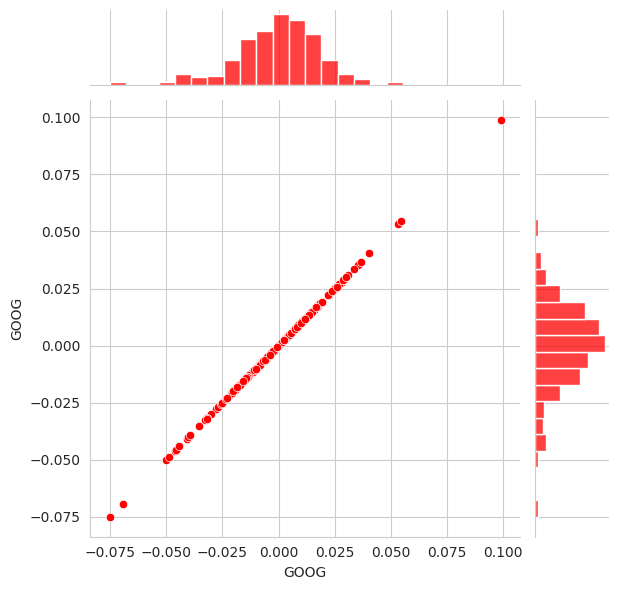

In [60]:
sns.jointplot(
    x="GOOG", y="GOOG", data=tech_returns, kind="scatter", color="red", legend=True
)
plt.show()

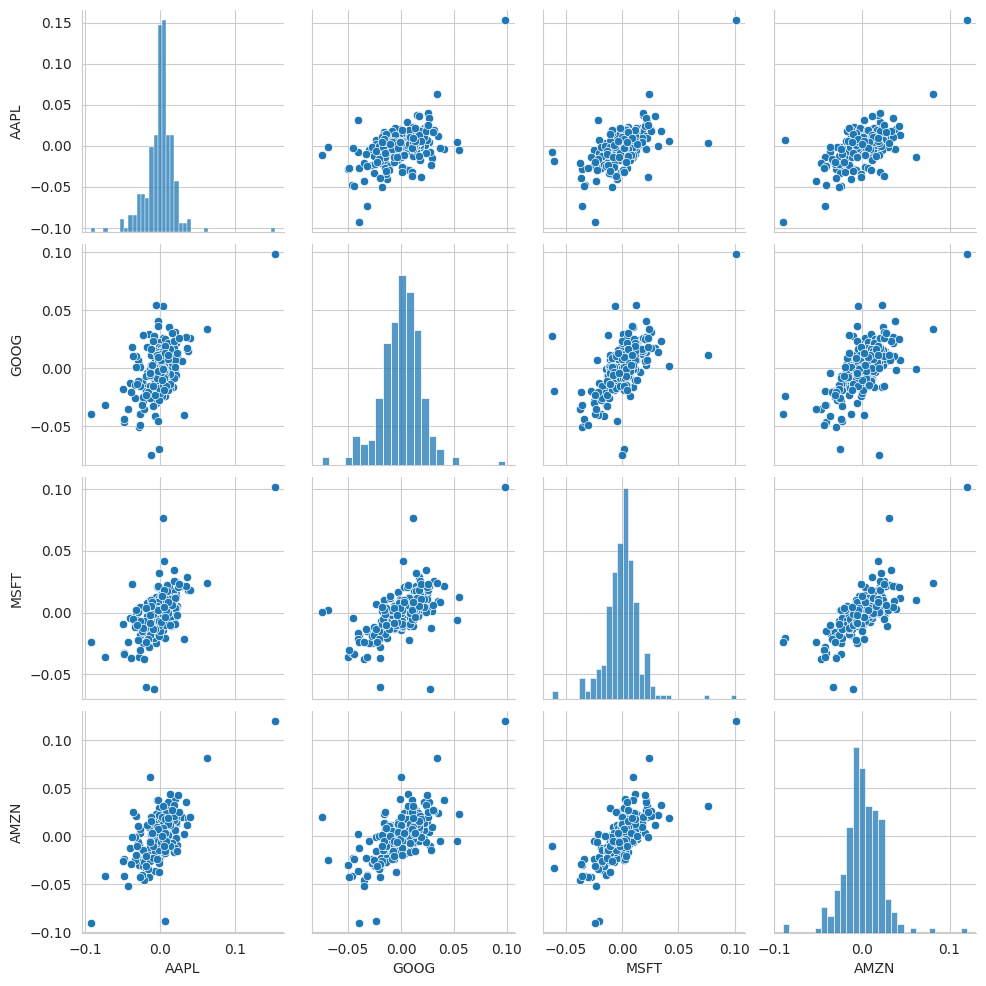

In [61]:
sns.pairplot(tech_returns.dropna())
plt.show()

We obtain all the relationships on daily returns between all the stocks.

The following gives us a control over what plot we want in the diagonal, upper triangle and the lower triangle.

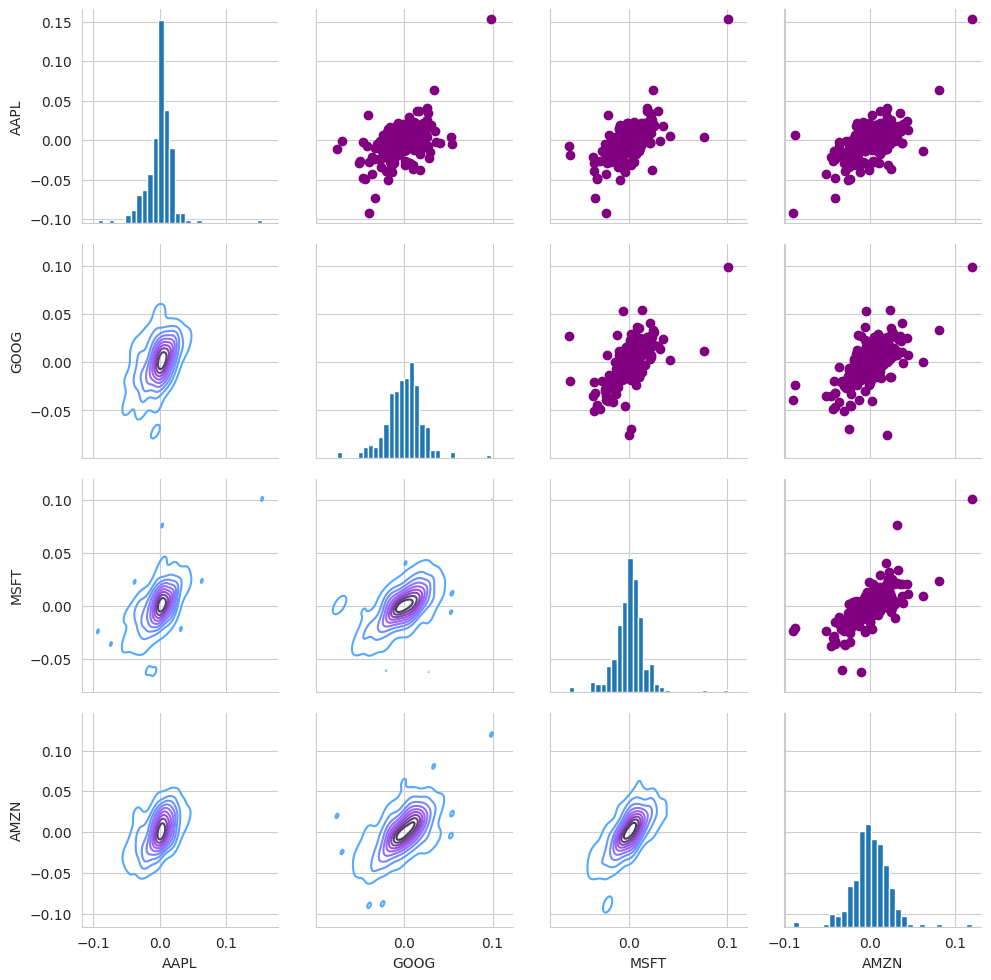

In [ ]:
# to ignore warnings
import warnings

warnings.filterwarnings("ignore")
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter, color="purple")

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap="cool_d")

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist, bins=30)


plt.show()

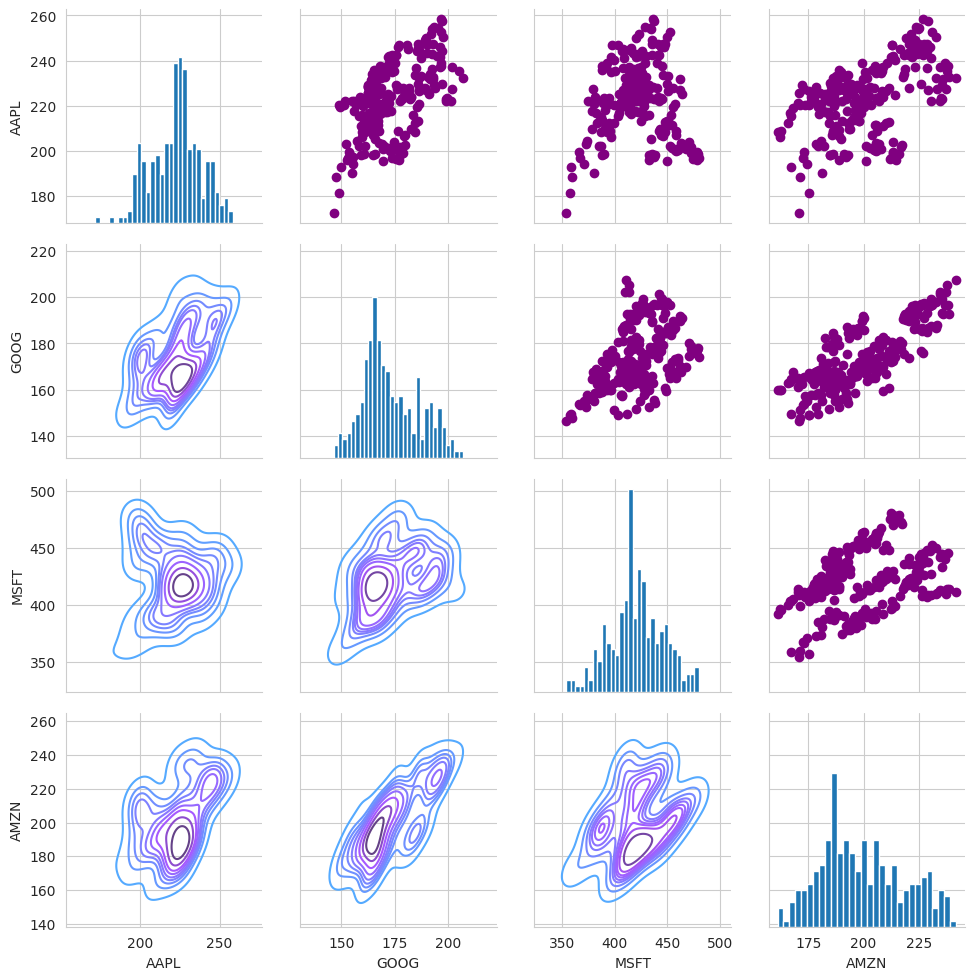

In [63]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap="cool_d")

returns_fig.map_diag(plt.hist,bins=30)

plt.show()

### Correlation Plot

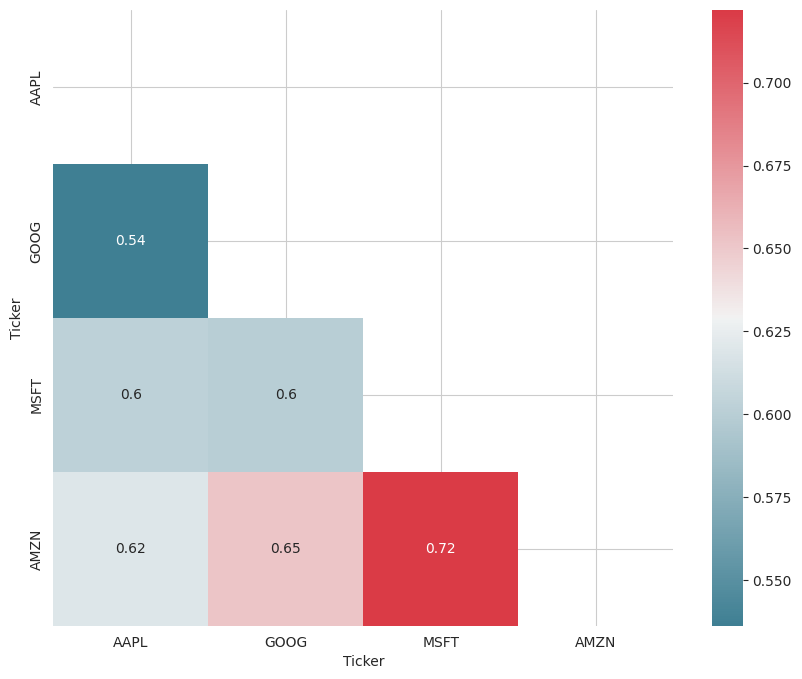

In [65]:
corr = tech_returns.dropna().corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig,ax = plt.subplots(figsize=(10,8))

cmap = sns.diverging_palette(220,10,as_cmap=True)

sns.heatmap(corr,mask=mask,cmap=cmap,annot=True)

plt.show()

### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.


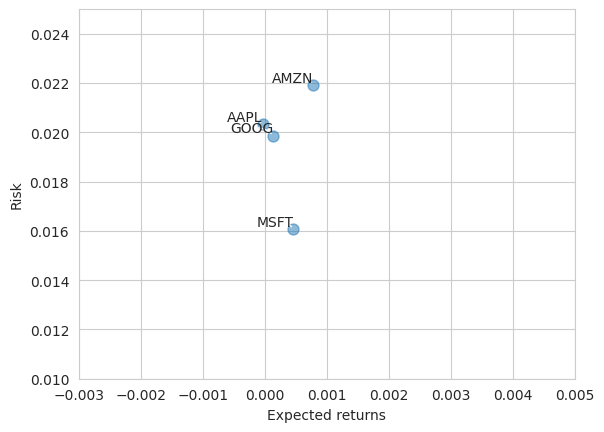

In [72]:
rets = tech_returns.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')

plt.ylim([0.01,0.025])

plt.xlim([-0.003,0.005])

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy = (x,y),xytext=(x + 0.0005, y + 0.0005),
        textcoords= 'offset points' , ha= 'right', va='bottom',
        arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=-0.3'))

#### Value at risk using the "bootstrap" method

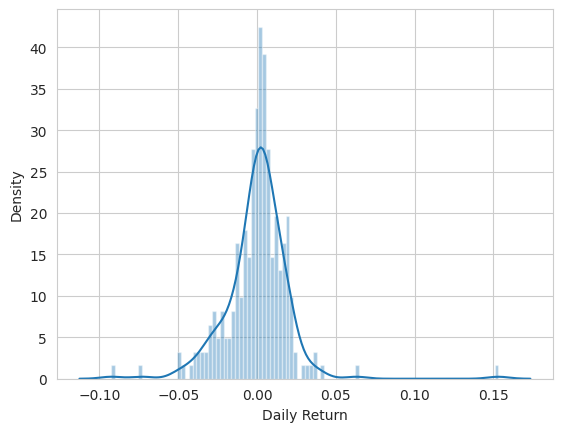

In [73]:
sns.distplot(AAPL["Daily Return"].dropna(), bins=100)
plt.show()

In [74]:
rets.head()

Ticker,AAPL,GOOG,MSFT,AMZN
Date,,,,
2024-06-21,-0.010444,0.014349,0.009154,0.016013
2024-06-24,0.003133,0.002940,-0.004691,-0.018564
2024-06-25,0.004468,0.026495,0.007327,0.004149
2024-06-26,0.019993,-0.001132,0.002683,0.039015
2024-06-27,0.003986,0.008038,0.001526,0.021900


In [78]:
emp = rets["AAPL"].quantile(0.05)
print("The 0.05 empirical quantile of daily returns is at", emp)

The 0.05 empirical quantile of daily returns is at -0.031732896183236534


### Value at Risk using the Monte Carlo Method

In [79]:
days = 365

deltaT = 1/days

mu = rets.mean()['GOOG']

sigma = rets = rets.std()['GOOG']

In [ ]:
def monte_carlo_simulation(start_price,days,mu,sigma):

    price = np.zeros(days)
    price[0]= start_price

    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*deltaT,scale=sigma*np.sqrt(deltaT))
        drift[x] = mu*deltaT
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
        
    return price

In [83]:
GOOG.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2024-06-20,176.860947,177.886024,175.616919,175.865724,16753200
2024-06-21,179.398743,181.639982,177.209257,177.637210,59728000
2024-06-24,179.926208,181.210054,179.368887,180.413873,18198300
2024-06-25,184.693344,184.862530,180.239719,180.279536,18917700
2024-06-26,184.484329,185.041651,183.110933,183.319921,13375700


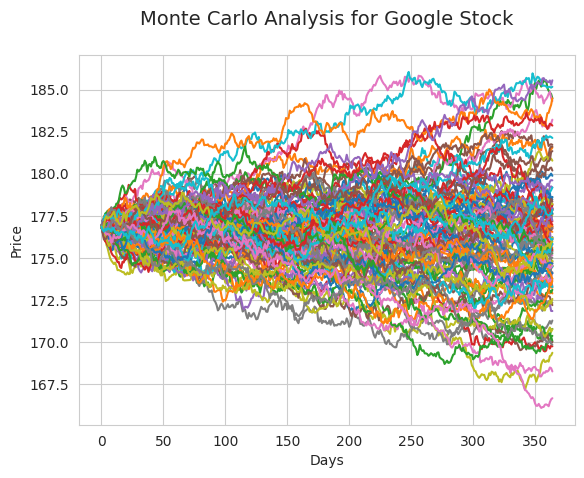

In [ ]:
start_price = 176.860947

for run in range(100):
    plt.plot(monte_carlo_simulation(start_price,days,mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Analysis for Google Stock\n", fontsize=14)
plt.show()

In [ ]:

runs = 10000

simulations = np.zeros(runs)
np.set_printoptions(threshold=5)

for run in range(runs):
    simulations[run] = monte_carlo_simulation(start_price, days, mu, sigma)[days - 1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days\n')

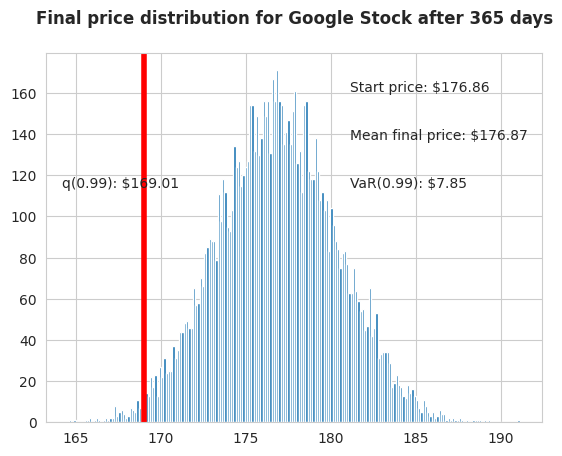

In [87]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" % start_price)

plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color="r")

plt.title(
    "Final price distribution for Google Stock after %s days\n" % days, weight="bold"
)